In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q


In [ ]:
df=pd.concat([train,test],axis=0,ignore_index=True)

In [ ]:
df.shape

(1309, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [ ]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,1014
Survived,418
Age,263
Embarked,2
Fare,1
Name,0
PassengerId,0
Pclass,0
Parch,0
SibSp,0


In [ ]:
df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
1304,NaN
1305,C105
1306,NaN
1307,NaN


In [ ]:
df['CabinDeck']=df['Cabin'].str[0]

In [ ]:
df['CabinDeck']=df['CabinDeck'].fillna('U')

In [ ]:
df['CabinDeck'].value_counts().sort_index()

,count
CabinDeck,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
T,1
U,1014


In [ ]:
df['CabinDeck']=df['CabinDeck'].replace(['A','B','C','D'],1)
df['CabinDeck']=df['CabinDeck'].replace(['E','F','G','T'],2)
df['CabinDeck']=df['CabinDeck'].replace(['U'],3)

In [ ]:
df['CabinDeck'].value_counts()

,count
CabinDeck,
3,1014
1,227
2,68


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['FamilySize']=df['SibSp']+df['Parch']+1

In [ ]:
df['Name'].head(25)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
import re

In [ ]:
def get_title(name):
  title_search = re.search(' ([A-Za-z]+)\.',name)
  if title_search:
    return title_search.group(1)
  return ''

In [ ]:
get_title('moocjka maskdma   pm   m  abc. pdas A asSAA A')

'abc'

In [ ]:
df['Title']=df['Name'].apply(get_title)

In [ ]:
df['Title'].sample(10)

,Title
474,Miss
678,Mrs
514,Mr
249,Rev
332,Mr
469,Miss
510,Mr
457,Mrs
594,Mr
1301,Miss


In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


In [ ]:
df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,264
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mme,1


In [ ]:
df['Title']=df['Title'].replace(['Mme'],'Mrs')

In [ ]:
rare_values = ['Rev', 'Dr', 'Col', 'Major', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer', 'Dona']

In [ ]:
df['Title']=df['Title'].replace(rare_values, 'Rare')

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,264
Mrs,198
Master,61
Rare,29


In [ ]:
df['Age'].value_counts()

,count
Age,
28.00,295
24.00,47
22.00,43
21.00,41
30.00,40
...,...
60.50,1
11.50,1
0.33,1


In [ ]:
df['Age_bin']=pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Child', 'Teenage', 'Adult', 'Elder'])

In [ ]:
df['Age_bin'].value_counts()

,count
Age_bin,
Adult,834
Elder,227
Teenage,154
Child,94


In [ ]:
df['Fare_bin']=pd.cut(df['Fare'], bins=[0,8,14,31,120], labels=['low_fare', 'median_fare', 'average_fare', 'high_fare'])

In [ ]:
test['PassengerId']

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
test.value_counts()

,,,,,,,,,,,count
PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,1
1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1
1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,1


In [ ]:
pass_id=test['PassengerId']

In [ ]:
drop_column=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin']

In [ ]:
df.drop(drop_column, axis=1, inplace=True)

In [ ]:
df.columns.values.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Embarked',
 'CabinDeck',
 'FamilySize',
 'Title',
 'Age_bin',
 'Fare_bin']

In [ ]:
df['Pclass'].corr(df['CabinDeck'])

np.float64(0.7323634977780974)

In [ ]:
df.head()

,Survived,Pclass,Sex,Embarked,CabinDeck,FamilySize,Title,Age_bin,Fare_bin
0,0.0,3,male,S,3,2,Mr,Adult,low_fare
1,1.0,1,female,C,1,2,Mrs,Adult,high_fare
2,1.0,3,female,S,3,1,Miss,Adult,low_fare
3,1.0,1,female,S,1,2,Mrs,Adult,high_fare
4,0.0,3,male,S,3,1,Mr,Adult,median_fare


In [ ]:
df=pd.get_dummies(df, columns=['Sex','Embarked','Title','Age_bin','Fare_bin'],prefix=['Sex','Embarked','Title','Age_bin','Fare_bin'],dtype=int)

In [ ]:
df.columns.values.tolist()

['Survived',
 'Pclass',
 'CabinDeck',
 'FamilySize',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Age_bin_Child',
 'Age_bin_Teenage',
 'Age_bin_Adult',
 'Age_bin_Elder',
 'Fare_bin_low_fare',
 'Fare_bin_median_fare',
 'Fare_bin_average_fare',
 'Fare_bin_high_fare']

In [ ]:
df.head()

,Survived,Pclass,CabinDeck,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Title_Mrs,Title_Rare,Age_bin_Child,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Fare_bin_low_fare,Fare_bin_median_fare,Fare_bin_average_fare,Fare_bin_high_fare
0,0.0,3,3,2,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1.0,1,1,2,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1.0,3,3,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1.0,1,1,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,0.0,3,3,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
import seaborn as sns

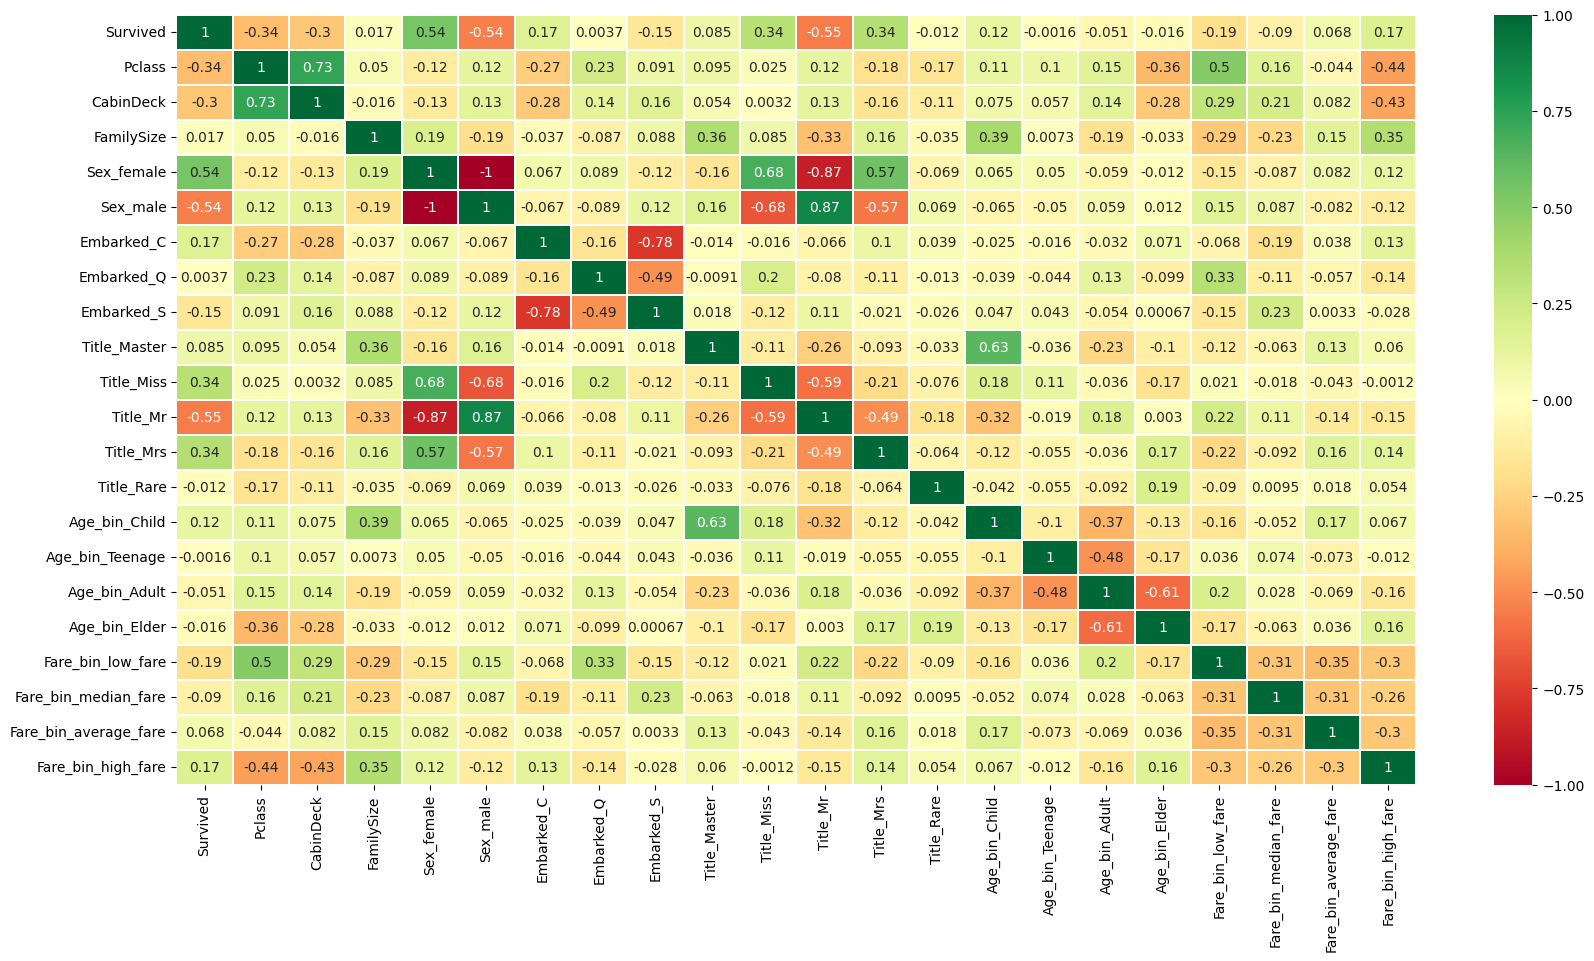

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [ ]:
df.shape

(1309, 22)

In [ ]:
test.shape

(418, 11)

In [ ]:
train_X=df[:891]
test_X=df[891:]

In [ ]:
train_X['Survived']

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [ ]:
train_X.drop(columns=['Survived'],inplace=True)

In [ ]:
train_X.columns

Index(['Pclass', 'CabinDeck', 'FamilySize', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_bin_Child',
       'Age_bin_Teenage', 'Age_bin_Adult', 'Age_bin_Elder',
       'Fare_bin_low_fare', 'Fare_bin_median_fare', 'Fare_bin_average_fare',
       'Fare_bin_high_fare'],
      dtype='object')

In [ ]:
test_X['Survived']

,Survived
891,NaN
892,NaN
893,NaN
894,NaN
895,NaN
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


In [ ]:
test_X.drop(columns=['Survived'],inplace=True)

In [ ]:
train_Y=train['Survived']

In [ ]:
from keras import models, layers

In [ ]:
from keras.layers import Dense, Dropout

In [ ]:
from keras import regularizers

In [ ]:
def titanic1():
  model=models.Sequential()
  model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(1,activation='sigmoid'))
  return model

In [ ]:
model1=titanic1()

In [ ]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model1.fit(train_X, train_Y, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4976 - loss: 0.8169 - val_accuracy: 0.6000 - val_loss: 0.7831
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5718 - loss: 0.7661 - val_accuracy: 0.6444 - val_loss: 0.7428
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6072 - loss: 0.7486 - val_accuracy: 0.6333 - val_loss: 0.7163
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6359 - loss: 0.7297 - val_accuracy: 0.6444 - val_loss: 0.6964
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6477 - loss: 0.7054 - val_accuracy: 0.6556 - val_loss: 0.6841
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6386 - loss: 0.7031 - val_accuracy: 0.6778 - val_loss: 0.6734
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6492 - loss: 0.6966 - val_accuracy: 0.6889 - val_loss: 0.6502
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6943 - loss: 0.6810 - val_accuracy: 0.7333 - val_loss: 0.6339


In [ ]:
pred=model1.predict(test_X)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
pred

array([[0.08279017],
       [0.3904588 ],
       [0.09696335],
       [0.10931082],
       [0.49758396],
       [0.12880109],
       [0.63700455],
       [0.17358936],
       [0.6915305 ],
       [0.1290696 ],
       [0.10035826],
       [0.21871307],
       [0.8738014 ],
       [0.15061876],
       [0.81087786],
       [0.8060511 ],
       [0.1163963 ],
       [0.12206165],
       [0.52127284],
       [0.6543484 ],
       [0.22782965],
       [0.29408845],
       [0.83305275],
       [0.28946716],
       [0.7892117 ],
       [0.104963  ],
       [0.9039107 ],
       [0.12206165],
       [0.25347605],
       [0.16563486],
       [0.15061875],
       [0.18672772],
       [0.45858225],
       [0.45858225],
       [0.44126585],
       [0.13366443],
       [0.57265586],
       [0.57265586],
       [0.10931082],
       [0.16189757],
       [0.13903417],
       [0.32021585],
       [0.08357706],
       [0.7071713 ],
       [0.8241732 ],
       [0.10035826],
       [0.28669783],
       [0.082

In [ ]:
pred01=np.where(pred<0.5,0,1)

In [ ]:
pred01.flatten()

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
pass_id

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
df=pd.DataFrame(pred01)

In [ ]:
submission=pd.DataFrame({'PassengerId':pass_id,'Survived':df[0]})

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('titanic1.csv',index=False)

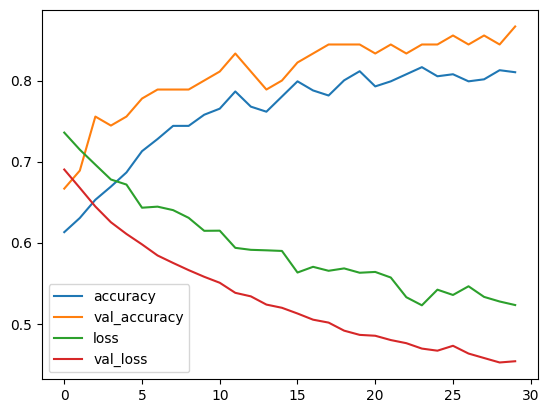

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()